In [1]:
import os


from sklearn.model_selection import train_test_split
import pandas as pd
import numpy

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_pickle('data/clean_data.pkl').sample(frac=0.1, random_state = 2) # Уменьшаем размер чтобы модель быстрее обучалась на лекции
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547701 entries, 313199 to 690900
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   price          547701 non-null  int64   
 1   date           547701 non-null  object  
 2   time           547701 non-null  object  
 3   geo_lat        547701 non-null  float32 
 4   geo_lon        547701 non-null  float32 
 5   region         547701 non-null  category
 6   building_type  547701 non-null  category
 7   level          547701 non-null  int8    
 8   levels         547701 non-null  int8    
 9   rooms          547701 non-null  int8    
 10  area           547701 non-null  float16 
 11  kitchen_area   547701 non-null  float16 
 12  object_type    547701 non-null  category
dtypes: category(3), float16(2), float32(2), int64(1), int8(3), object(2)
memory usage: 26.1+ MB


In [3]:
df = df.rename(columns={'price': 'target'})
df = df.drop(columns=['date', 'time'])

In [4]:
df

target    geo_lat    geo_lon region building_type  level  levels  \
313199   4999999  59.958458  30.215530   2661             3      8      13   
2437764  2150000  45.072674  41.936996   2900             3      5       5   
4949072  8600000  59.939358  30.437069   2661             2     11      22   
4109465  5100000  59.740479  30.569540   2661             1      2       9   
2187702  3470000  56.324062  44.005390   2871             2     11      26   
...          ...        ...        ...    ...           ...    ...     ...   
5188085  2300000  57.750603  40.866467   4189             3      2       3   
4542014  6700000  55.911720  37.737419     81             3      2       5   
3306731  3850000  51.704510  39.273037   2072             2     10      18   
520293   1878885  54.943577  82.958862   9654             1      1      10   
690900   4097350  59.882702  30.451246   2661             2      6      23   

         rooms      area  kitchen_area object_type  
313199       1  36.00000      7.199219           1  
2437764      1  52.00000     15.000000           1  
4949072      1  37.09375      9.796875           1  
4109465      3  74.50000      9.500000           1  
2187702      2  54.00000      8.000000          11  
...        ...       ...           ...         ...  
5188085      1  38.00000     11.000000           1  
4542014      2  66.37500      8.000000           1  
3306731      3  89.50000     14.203125           1  
520293       3  87.75000     12.921875          11  
690900       1  36.09375     16.203125          11  

[547701 rows x 11 columns]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.25, random_state=2)

In [6]:
X_train.iloc[0]

geo_lat            56.327686
geo_lon            43.928062
region           2871.000000
building_type       1.000000
level               8.000000
levels             10.000000
rooms               2.000000
area               56.000000
kitchen_area        8.500000
object_type         1.000000
Name: 879487, dtype: float64

In [7]:
cat_features = X_train.select_dtypes(include=['category','object']).columns.to_list()
cat_features

['region', 'building_type', 'object_type']

In [8]:
num_features = X_train.select_dtypes(include=['number']).columns.to_list()
num_features

['geo_lat', 'geo_lon', 'level', 'levels', 'rooms', 'area', 'kitchen_area']

https://scikit-learn.org/stable/api/sklearn.preprocessing.html - разные способы кодирования и скалирования

In [9]:
s_scaler = StandardScaler()
l_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=99999999) # unknown_value нужно выбирать с умом
regressor = CatBoostRegressor()

## Column transformer

In [10]:
# Для удобной работы со столбцами
preprocessor = ColumnTransformer(
    transformers=[
        ('num', s_scaler, num_features),  # преобразования для числовых признаков
        ('cat', l_encoder, cat_features), # преобразования для категориальных признаков
    ],
    remainder='drop' ) # Удаляем столбцы, которые не затронуты преобразования

In [11]:

pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('model', regressor)])

pipeline.fit(X_train, y_train)


Learning rate set to 0.105957
0:	learn: 22102085.4544239	total: 67.8ms	remaining: 1m 7s
1:	learn: 21994630.3403412	total: 87.1ms	remaining: 43.4s
2:	learn: 21906687.8196027	total: 105ms	remaining: 34.8s
3:	learn: 21834890.5050552	total: 124ms	remaining: 30.9s
4:	learn: 21770820.6751194	total: 143ms	remaining: 28.5s
5:	learn: 21719543.9330108	total: 163ms	remaining: 27s
6:	learn: 21676510.1666598	total: 183ms	remaining: 25.9s
7:	learn: 21641355.8079016	total: 202ms	remaining: 25.1s
8:	learn: 21612289.0494648	total: 223ms	remaining: 24.5s
9:	learn: 21583808.7061085	total: 242ms	remaining: 24s
10:	learn: 21559288.9618040	total: 266ms	remaining: 23.9s
11:	learn: 21537048.9920531	total: 286ms	remaining: 23.5s
12:	learn: 21444526.1629239	total: 306ms	remaining: 23.3s
13:	learn: 21426349.3370315	total: 324ms	remaining: 22.8s
14:	learn: 21411901.2338278	total: 344ms	remaining: 22.6s
15:	learn: 21399279.8023459	total: 360ms	remaining: 22.1s
16:	learn: 21299421.1434822	total: 382ms	remaining: 22

154:	learn: 18272215.6509019	total: 2.22s	remaining: 12.1s
155:	learn: 18263878.2178516	total: 2.23s	remaining: 12.1s
156:	learn: 18256009.4859248	total: 2.25s	remaining: 12.1s
157:	learn: 18248529.7799856	total: 2.26s	remaining: 12.1s
158:	learn: 18241388.0845094	total: 2.28s	remaining: 12s
159:	learn: 18234700.5127085	total: 2.29s	remaining: 12s
160:	learn: 18228095.5839778	total: 2.3s	remaining: 12s
161:	learn: 18222087.5153066	total: 2.31s	remaining: 12s
162:	learn: 18215963.2971261	total: 2.33s	remaining: 12s
163:	learn: 18210272.5545163	total: 2.34s	remaining: 11.9s
164:	learn: 18208920.7703569	total: 2.35s	remaining: 11.9s
165:	learn: 18204704.7145239	total: 2.37s	remaining: 11.9s
166:	learn: 18187135.8260335	total: 2.38s	remaining: 11.9s
167:	learn: 18183064.7135734	total: 2.39s	remaining: 11.9s
168:	learn: 18177887.1670860	total: 2.41s	remaining: 11.8s
169:	learn: 18173022.2110313	total: 2.42s	remaining: 11.8s
170:	learn: 18168573.4167384	total: 2.44s	remaining: 11.8s
171:	lea

294:	learn: 17450925.6159031	total: 4.06s	remaining: 9.7s
295:	learn: 17450685.1155343	total: 4.07s	remaining: 9.68s
296:	learn: 17447975.7379237	total: 4.08s	remaining: 9.66s
297:	learn: 17446417.7251561	total: 4.1s	remaining: 9.65s
298:	learn: 17446166.7629704	total: 4.11s	remaining: 9.63s
299:	learn: 17445963.1442260	total: 4.12s	remaining: 9.61s
300:	learn: 17445745.7958927	total: 4.13s	remaining: 9.58s
301:	learn: 17444963.9290154	total: 4.14s	remaining: 9.57s
302:	learn: 17432650.1591210	total: 4.15s	remaining: 9.55s
303:	learn: 17430525.1210288	total: 4.17s	remaining: 9.54s
304:	learn: 17418414.4601453	total: 4.18s	remaining: 9.52s
305:	learn: 17417977.4735651	total: 4.19s	remaining: 9.5s
306:	learn: 17335624.2943914	total: 4.2s	remaining: 9.49s
307:	learn: 17323558.9233681	total: 4.21s	remaining: 9.47s
308:	learn: 17323047.3527617	total: 4.22s	remaining: 9.45s
309:	learn: 17322403.3488620	total: 4.24s	remaining: 9.43s
310:	learn: 17322187.6973801	total: 4.25s	remaining: 9.41s
3

446:	learn: 16528766.2012617	total: 5.91s	remaining: 7.31s
447:	learn: 16518018.7193100	total: 5.92s	remaining: 7.3s
448:	learn: 16508723.6897544	total: 5.94s	remaining: 7.29s
449:	learn: 16508487.2637814	total: 5.95s	remaining: 7.27s
450:	learn: 16473955.6540161	total: 5.96s	remaining: 7.26s
451:	learn: 16453172.0203944	total: 5.98s	remaining: 7.25s
452:	learn: 16451483.6324413	total: 5.99s	remaining: 7.23s
453:	learn: 16451257.8036014	total: 6s	remaining: 7.22s
454:	learn: 16448369.9508352	total: 6.02s	remaining: 7.21s
455:	learn: 16446719.1385193	total: 6.03s	remaining: 7.19s
456:	learn: 16420736.1369659	total: 6.04s	remaining: 7.18s
457:	learn: 16420629.2824606	total: 6.05s	remaining: 7.16s
458:	learn: 16420336.6729748	total: 6.07s	remaining: 7.15s
459:	learn: 16420155.4584530	total: 6.08s	remaining: 7.13s
460:	learn: 16419734.8233202	total: 6.09s	remaining: 7.12s
461:	learn: 16419517.6225944	total: 6.1s	remaining: 7.1s
462:	learn: 16406145.7183320	total: 6.12s	remaining: 7.09s
463

593:	learn: 15795256.4491006	total: 7.74s	remaining: 5.29s
594:	learn: 15784420.7363473	total: 7.76s	remaining: 5.28s
595:	learn: 15784290.1819258	total: 7.78s	remaining: 5.27s
596:	learn: 15783955.0773924	total: 7.79s	remaining: 5.26s
597:	learn: 15781518.5372107	total: 7.8s	remaining: 5.25s
598:	learn: 15779547.4210947	total: 7.82s	remaining: 5.24s
599:	learn: 15777334.3663340	total: 7.83s	remaining: 5.22s
600:	learn: 15774774.7721883	total: 7.85s	remaining: 5.21s
601:	learn: 15774672.2356339	total: 7.86s	remaining: 5.2s
602:	learn: 15773528.0736833	total: 7.87s	remaining: 5.18s
603:	learn: 15768721.3649454	total: 7.89s	remaining: 5.17s
604:	learn: 15768502.0877019	total: 7.9s	remaining: 5.16s
605:	learn: 15768057.4929247	total: 7.92s	remaining: 5.15s
606:	learn: 15767950.4285043	total: 7.93s	remaining: 5.14s
607:	learn: 15767445.1324607	total: 7.95s	remaining: 5.12s
608:	learn: 15767269.0628064	total: 7.96s	remaining: 5.11s
609:	learn: 15767020.8174624	total: 7.97s	remaining: 5.1s
6

735:	learn: 15433672.4484876	total: 9.59s	remaining: 3.44s
736:	learn: 15433490.1840146	total: 9.6s	remaining: 3.43s
737:	learn: 15433308.6881010	total: 9.61s	remaining: 3.41s
738:	learn: 15433042.7409848	total: 9.63s	remaining: 3.4s
739:	learn: 15432541.8769518	total: 9.64s	remaining: 3.39s
740:	learn: 15431856.6761047	total: 9.66s	remaining: 3.38s
741:	learn: 15431804.7359345	total: 9.67s	remaining: 3.36s
742:	learn: 15427355.2392047	total: 9.68s	remaining: 3.35s
743:	learn: 15427218.1028185	total: 9.69s	remaining: 3.33s
744:	learn: 15424332.1093472	total: 9.7s	remaining: 3.32s
745:	learn: 15388321.8033125	total: 9.71s	remaining: 3.31s
746:	learn: 15377267.9048803	total: 9.73s	remaining: 3.29s
747:	learn: 15374625.6198420	total: 9.74s	remaining: 3.28s
748:	learn: 15370386.0426691	total: 9.75s	remaining: 3.27s
749:	learn: 15359901.4299089	total: 9.77s	remaining: 3.25s
750:	learn: 15358774.7332579	total: 9.78s	remaining: 3.24s
751:	learn: 15358651.8711020	total: 9.79s	remaining: 3.23s


877:	learn: 14920619.6869935	total: 11.4s	remaining: 1.59s
878:	learn: 14920259.9887151	total: 11.4s	remaining: 1.57s
879:	learn: 14918671.6063618	total: 11.4s	remaining: 1.56s
880:	learn: 14909484.3446534	total: 11.5s	remaining: 1.55s
881:	learn: 14909331.3722806	total: 11.5s	remaining: 1.53s
882:	learn: 14909000.4744294	total: 11.5s	remaining: 1.52s
883:	learn: 14907810.4215534	total: 11.5s	remaining: 1.51s
884:	learn: 14907739.9399244	total: 11.5s	remaining: 1.5s
885:	learn: 14907643.8234156	total: 11.5s	remaining: 1.48s
886:	learn: 14902234.6414918	total: 11.5s	remaining: 1.47s
887:	learn: 14899639.1808572	total: 11.5s	remaining: 1.46s
888:	learn: 14898572.6302420	total: 11.6s	remaining: 1.44s
889:	learn: 14898481.9011232	total: 11.6s	remaining: 1.43s
890:	learn: 14898396.0569341	total: 11.6s	remaining: 1.42s
891:	learn: 14897825.8306216	total: 11.6s	remaining: 1.4s
892:	learn: 14897667.5383103	total: 11.6s	remaining: 1.39s
893:	learn: 14894977.2967186	total: 11.6s	remaining: 1.38s

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['geo_lat', 'geo_lon',
                                                   'level', 'levels', 'rooms',
                                                   'area', 'kitchen_area']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=99999999),
                                                  ['region', 'building_type',
                                                   'object_type'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7be8319969b0>)])

In [15]:
        model_params = {
            "geo_lat":56.327686,
            "geo_lon":43.928062,
            "region":2871.000000,
            "building_type":1.000000,
            "level":8.000000,
            "levels":10.000000,
            "rooms":2.000000,
            "area":56.000000,
            "kitchen_area":8.500000,
            "object_type":1.000000,
            "floor_level":0,
            }
        df_pred = pd.DataFrame(model_params, index=[0])

In [16]:

pipeline.predict(df_pred)

array([3414175.89042869])

In [14]:
predictions = pipeline.predict(X_test) 

metrics = {}
metrics["mae"] = mean_absolute_error(y_test, predictions)   
metrics["mape"] = mean_absolute_percentage_error(y_test, predictions)
metrics["mse"] = mean_squared_error(y_test, predictions)

metrics

{'mae': 1447931.3425270966,
 'mape': 1.6294525363466488e+18,
 'mse': 281898017343454.56}

In [12]:

# Работаем с MLflow локально
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

registry_uri = f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}"
tracking_uri = f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}"

mlflow.set_tracking_uri(tracking_uri)   
mlflow.set_registry_uri(registry_uri)   



In [13]:
# название тестового эксперимента, запуска (run) внутри него, имени, под которым модель будет регистрироваться
EXPERIMENT_NAME = "estate_project"
RUN_NAME = "baseline model"
REGISTRY_MODEL_NAME = "estate_model_rf"

# Логируем вручную

In [ ]:
# Обязательно логируем сигнатуру модели и пример входных данных. Подготовим их
from mlflow.models import infer_signature

signature =  infer_signature(model_input = X_train.head(5))
input_example = X_train.head(5)

In [15]:
# Будем логировать requirements и артефакт - текстовый файл
req_file = 'requirements.txt'
art = 'comment.txt'

In [16]:
# Параметры, котороые будут залогированы, можем задавать вручную или полностью взять из модели
#params_dict = {'n_estimators': 10, 'max_depth': 10}
params_dict = pipeline.get_params()

In [ ]:
# Когда создаем новый эксперимент, то: 
experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)

# Впоследствии. чтобы добавлять запуски в этот же эксепримент мы должны получить его id:
#experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(params_dict)

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

# Удаление runs, experiments

Использовать осторожно

In [18]:
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
#mlflow.delete_experiment(experiment_id)

In [ ]:
mlflow.search_runs(
    #experiment_ids=[experiment_id],
    experiment_names=[EXPERIMENT_NAME],
    # filter_string='status = "FAILED"'
    #filter_string='metrics.mae > 1'
    
)

In [20]:

#mlflow.delete_run('74d2a7a40c07413c9cf65df841164356')

# Автологирование
После включения будет срабатывать на каждом обучении модели (на методе fit()).

Есть плюсы, есть и минусы. Предлагается сделать прогон и сравнить с результатами вручную 

In [ ]:
mlflow.sklearn.autolog()

with mlflow.start_run(run_name='auto', experiment_id=experiment_id) as run:
    pipeline.fit(X_train, y_train)


In [22]:
# Отключаем автологирование
mlflow.sklearn.autolog(disable=True)

# Model #2
Обучим вторую "маленькую" модель


In [23]:
regressor2 = RandomForestRegressor(n_estimators=10, max_depth=6)

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('model', regressor2)])

pipeline.fit(X_train, y_train)

In [ ]:
predictions = pipeline.predict(X_test) 
metrics = {}
metrics["mae"] = mean_absolute_error(y_test, predictions)   
metrics["mape"] = mean_absolute_percentage_error(y_test, predictions)
metrics["mse"] = mean_squared_error(y_test, predictions)

metrics

In [ ]:
# !!! Проверить название прогона а также все логируемые параметры и артефакты, что они соответствуют второй "маленькой" модели. 


RUN_NAME = 'smaller_model'

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(pipeline.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

In [ ]:
# No model
# Логировать можно только артефакты, без модели. Например, залогироавть графики после этапа EDA

RUN_NAME = 'no_model'
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id 
    mlflow.log_artifact(art)


run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')


In [ ]:
run_id = '06fa7ec1f1b74aedb3509c88dc4ee1c0' # Указываем run id
mlflow.register_model(f"runs:/{run_id}/models", REGISTRY_MODEL_NAME)

In [ ]:
# Можно регистрировать сразу при создании прогона

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

with mlflow.start_run(run_name='register_at_run', experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file,
                             registered_model_name = REGISTRY_MODEL_NAME # Указываем для какой модели регистрируем
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(pipeline.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

In [ ]:
# Можно найти зарегистрированные модели
model_reg = mlflow.search_registered_models()
model_reg[0]

In [32]:

model_name = REGISTRY_MODEL_NAME
model_version = 1

model_loaded = mlflow.sklearn.load_model(model_uri=f"models:/{model_name}/{model_version}")


In [ ]:
model_loaded.predict(X_test.iloc[0:1])

In [ ]:
y_test.iloc[0]

# Feature engineering

## Sklearn

In [35]:
from sklearn.preprocessing import QuantileTransformer, SplineTransformer, PolynomialFeatures, MinMaxScaler

In [36]:
X_train_sklearn = X_train.copy()

#### PolynomialFeatures
Создает полином степени `degree` из указанных признаков


In [37]:
pf = PolynomialFeatures(degree=2)

In [ ]:
X_train_sklearn

In [ ]:
pf.fit_transform(X_train_sklearn[['area','kitchen_area']])

#### SplineTransformer
Cоздаёт новую матрицу признаков, состоящую из сплайнов порядка degree. Количество сгенерированных сплайнов равно `n_splines=n_knots + degree - 1` для каждого признака, где

`n_knots` определяет количество узлов (точек, в которых сопрягаются сплайны) для каждого признака. 

`degree` определяет порядок полинома, используемого для построения сплайнов. 

In [43]:
sp = SplineTransformer(n_knots=3, degree=3)

In [ ]:
sp.fit_transform(X_train_sklearn[['area']])

#### QuantileTransformer
Этот метод преобразует признаки, чтобы они распределялись равномерно или нормально — так данные меньше подвергаются влиянию выбросов. Преобразование применяется к каждому признаку независимо. Идея метода такова: оценить функцию распределения признака, чтобы преобразовать исходные значения в равномерное или нормальное распределение. 

`output_distribution='uniform'` или
`output_distribution='normal'` соответственно


Пример использования: если у вас есть данные о доходах с широким диапазоном значений, квантильное преобразование сделает их более сопоставимыми и устойчивыми к выбросам.

In [47]:
qt = QuantileTransformer()

In [ ]:
qt.fit_transform(X_train_sklearn[['area']])

### Объединяем в ColumnTransformer и создаем Pipeline 

In [49]:
pf = PolynomialFeatures(degree=2)
qt = QuantileTransformer()
sp = SplineTransformer(n_knots=3, degree=3)

In [50]:
# Значения преобразованных признаков нужно отскейлить, поэтому создаем pipeline из двух шагов - преобразование и скейлинг
pf_pipeline = Pipeline(steps=[
    ('poly', pf),
    ('scale', StandardScaler())
])

In [51]:
preprocessor_sklearn = ColumnTransformer(
    transformers=[
        ('num', s_scaler, num_features),  # преобразования для числовых признаков
        ('cat', l_encoder, cat_features), # преобразования для категориальных признаков
        ('quantile', qt,num_features),
        ('poly', pf_pipeline, ['area', 'kitchen_area']), # В преобразования добавляем созданный ранее pipeline
        ('spline', sp, ['area'])
    ],
    remainder='drop',
    ) # Удаляем столбцы, которые не затронуты преобразования

### Посмотрим что из себя теперь представляет датафрейм

In [56]:
## не влезаем в float64 в полиномальном преобразовании. Использовать его нужно с умом!
X_train_sklearn[['area', 'kitchen_area']] = X_train_sklearn[['area', 'kitchen_area']].astype('float128')
X_train_sklearn[['area', 'kitchen_area']] = X_train_sklearn[['area', 'kitchen_area']].astype('float128')

In [58]:
X_train_sklearn_raw = preprocessor_sklearn.fit_transform(X_train_sklearn)
X_train_sklearn = pd.DataFrame(X_train_sklearn_raw, columns=preprocessor_sklearn.get_feature_names_out())

In [80]:
# Удобно использовать для отображения всех строк\столбцов в DataFrame
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display (X_train_sklearn)

num__geo_lat  num__geo_lon  num__level  num__levels  num__rooms  \
0           0.495902     -0.449742    0.359235    -0.214789    0.253413   
1           0.177806      1.433673   -0.246529    -0.367718    0.253413   
...              ...           ...         ...          ...         ...   
410773     -0.748366     -0.804077   -0.650371     0.702788    0.253413   
410774      1.257769     -1.101815   -0.044608     0.091070    1.175911   

        num__area  num__kitchen_area  cat__region  cat__building_type  \
0        0.063735          -0.186285         20.0                 1.0   
1       -0.114293          -0.186285         70.0                 1.0   
...           ...                ...          ...                 ...   
410773   1.365441           1.501833         52.0                 3.0   
410774   0.553789          -0.142544         14.0                 1.0   

        cat__object_type  quantile__geo_lat  quantile__geo_lon  \
0                    0.0           0.766257           0.511028   
1                    0.0           0.297142           0.867999   
...                  ...                ...                ...   
410773               0.0           0.193143           0.114753   
410774               0.0           0.908036           0.075725   

        quantile__level  quantile__levels  quantile__rooms  quantile__area  \
0              0.717217          0.536537         0.600601        0.623624   
1              0.522022          0.386887         0.600601        0.541542   
...                 ...               ...              ...             ...   
410773         0.309810          0.741742         0.600601        0.961367   
410774         0.604605          0.645646         0.867367        0.841842   

        quantile__kitchen_area  poly__1  poly__area  poly__kitchen_area  \
0                     0.374875      0.0    0.063735           -0.186285   
1                     0.374875      0.0   -0.114293           -0.186285   
...                        ...      ...         ...                 ...   
410773                0.984535      0.0    1.365441            1.501833   
410774                0.436436      0.0    0.553789           -0.142544   

        poly__area^2  poly__area kitchen_area  poly__kitchen_area^2  \
0          -0.010002                -0.132188             -0.002792   
1          -0.017375                -0.169370             -0.002792   
...              ...                      ...                   ...   
410773      0.068438                 1.570163              0.008616   
410774      0.014463                -0.002742             -0.002649   

        spline__area_sp_0  spline__area_sp_1  spline__area_sp_2  \
0                0.155806           0.666179           0.178013   
1                0.156921           0.666275           0.176803   
...                   ...                ...                ...   
410773           0.147820           0.665159           0.187011   
410774           0.152767           0.665860           0.181370   

        spline__area_sp_3  spline__area_sp_4  
0                0.000002                0.0  
1                0.000001                0.0  
...                   ...                ...  
410773           0.000010                0.0  
410774           0.000004                0.0  

[410775 rows x 28 columns]

### Создаем пайплайн с препроцессингом и моделью

In [ ]:
pipeline_sklearn = Pipeline(steps=[
    ('transform', preprocessor_sklearn),
    ('model', regressor)
])

model_sklearn = pipeline_sklearn.fit(X_train, y_train)

In [ ]:
model_sklearn

In [ ]:
predictions = model_sklearn.predict(X_test) 
metrics = {}
metrics["mae"] = mean_absolute_error(y_test, predictions)   
metrics["mape"] = mean_absolute_percentage_error(y_test, predictions)
metrics["mse"] = mean_squared_error(y_test, predictions)

metrics

In [ ]:
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = 'fe_sklearn'

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(model_sklearn, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(model_sklearn.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

## Autofeat

In [65]:
from autofeat import AutoFeatRegressor
transformations = ["1/", "exp", "log", "abs", "sqrt", "^2", "^3", "1+", "1-", "sin", "cos", "exp-", "2^"] 

In [ ]:
afreg = AutoFeatRegressor(verbose=1, feateng_steps=2, max_gb=8, transformations=["log", "sqrt"],feateng_cols=num_features)
X_train_arf = afreg.fit_transform(X_train,y_train)
X_train_arf

In [67]:
# Создаем обертку, в которой добавляем метод get_feature_names_out() для получения названий признаков
import numpy as np

class AutoFeatWrapper():
    def __init__(self, feateng_cols, feateng_steps=1, max_gb=16, transformations=["1/", "exp", "log"], n_jobs=-1, verbose=1):
        self.feateng_cols = feateng_cols
        self.feateng_steps = feateng_steps
        self.max_gb = max_gb
        self.transformations = transformations
        self.n_jobs = n_jobs
        self.afreg = AutoFeatRegressor(feateng_cols=self.feateng_cols,
                                     feateng_steps=self.feateng_steps,
                                     max_gb=self.max_gb,
                                     transformations=self.transformations,
                                     n_jobs=self.n_jobs)
        
    def fit(self, X, y=None):
        self.afreg.fit(X, y)
        return self
    
    def transform(self, X):
        return self.afreg.transform(X)
    
    def get_feature_names_out(self, input_features=None):
        # Преобразуем данные и возвращаем имена фичей из DataFrame
        transformed_X = self.afreg.transform(pd.DataFrame(np.zeros((1, len(self.feateng_cols))), columns=self.feateng_cols))
        return transformed_X.columns.tolist()

In [69]:
afreg_pipeline = Pipeline(steps=[
    ('autofeat', AutoFeatWrapper( feateng_steps=2, max_gb=16, transformations=["log", "sqrt"],feateng_cols=num_features)),
    ('scaler', StandardScaler()),
])

In [70]:
preprocessor_afr = ColumnTransformer(
    transformers=[
        ('num', s_scaler, num_features),  # преобразования для числовых признаков
        ('cat', l_encoder, cat_features), # преобразования для категориальных признаков
        ('afr', afreg_pipeline, num_features), # преобразования autofeat
    ],
    remainder='drop', # Удаляем столбцы, которые не затронуты преобразованиями
    ) 

In [ ]:
X_train_afr_raw =  preprocessor_afr.fit_transform(X_train,y_train)
X_train_afr = pd.DataFrame(X_train_afr_raw, columns=preprocessor_afr.get_feature_names_out())

In [81]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display (X_train_afr)


num__geo_lat  num__geo_lon  num__level  num__levels  num__rooms  \
0           0.495902     -0.449742    0.359235    -0.214789    0.253413   
1           0.177806      1.433673   -0.246529    -0.367718    0.253413   
...              ...           ...         ...          ...         ...   
410773     -0.748366     -0.804077   -0.650371     0.702788    0.253413   
410774      1.257769     -1.101815   -0.044608     0.091070    1.175911   

        num__area  num__kitchen_area  cat__region  cat__building_type  \
0        0.063735          -0.186285         20.0                 1.0   
1       -0.114293          -0.186285         70.0                 1.0   
...           ...                ...          ...                 ...   
410773   1.365441           1.501833         52.0                 3.0   
410774   0.553789          -0.142544         14.0                 1.0   

        cat__object_type  afr__geo_lat  afr__geo_lon  afr__level  afr__levels  \
0                    0.0      0.495902     -0.449742    0.359235    -0.214789   
1                    0.0      0.177806      1.433673   -0.246529    -0.367718   
...                  ...           ...           ...         ...          ...   
410773               0.0     -0.748366     -0.804077   -0.650371     0.702788   
410774               0.0      1.257769     -1.101815   -0.044608     0.091070   

        afr__rooms  afr__area  afr__kitchen_area  afr__area*rooms  \
0         0.253413   0.063735          -0.186285         0.006208   
1         0.253413  -0.114293          -0.186285        -0.083402   
...            ...        ...                ...              ...   
410773    0.253413   1.365441           1.501833         0.661427   
410774    1.175911   0.553789          -0.142544         0.807887   

        afr__area*geo_lon  afr__levels*rooms  afr__area*kitchen_area  \
0               -0.195129           0.060916               -0.132188   
1                0.655053          -0.054279               -0.169370   
...                   ...                ...                     ...   
410773           0.375199           0.752088                1.570163   
410774          -0.330070           0.982478               -0.002742   

        afr__sqrt(area)*geo_lat  afr__sqrt(area)*log(level)  \
0                      0.373151                    0.688076   
1                      0.005114                    0.071369   
...                         ...                         ...   
410773                 1.274445                   -0.002521   
410774                 1.338996                    0.635065   

        afr__kitchen_area*log(level)  afr__sqrt(area)*kitchen_area  \
0                           0.044178                     -0.211335   
1                          -0.173647                     -0.252775   
...                              ...                           ...   
410773                      0.745507                      2.382258   
410774                     -0.040302                     -0.055435   

        afr__geo_lon*log(kitchen_area)  afr__sqrt(area)*sqrt(kitchen_area)  \
0                            -0.481294                           -0.153548   
1                             1.191304                           -0.267268   
...                                ...                                 ...   
410773                        0.071599                            2.828890   
410774                       -1.025588                            0.202136   

        afr__sqrt(geo_lon)*sqrt(kitchen_area)  afr__log(area)  \
0                                   -0.490805        0.307835   
1                                    0.615798        0.031907   
...                                       ...             ...   
410773                               1.431272        1.729715   
410774                              -0.916054        0.940624   

        afr__rooms*log(level)  afr__kitchen_area*rooms  \
0                    0.690329                -0.132529   
1      

In [ ]:
pipeline_afr = Pipeline(steps=[('preprocessor', preprocessor_afr), 
                               ('model', regressor)])

pipeline_afr.fit(X_train, y_train)


In [ ]:
predictions = pipeline_afr.predict(X_test) 

metrics = {}
metrics["mae"] = mean_absolute_error(y_test, predictions)   
metrics["mape"] = mean_absolute_percentage_error(y_test, predictions)
metrics["mse"] = mean_squared_error(y_test, predictions)

metrics

In [ ]:

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

with mlflow.start_run(run_name='autofeat', experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(pipeline_afr, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(pipeline_afr.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

# FEATURE SELECTION
## RFE
### Используем autofeat признаки
Поскольку autofeat дает разные совокупности сгенерированных признаков, мы можем добавить выбор информативных только как шаг пайплайна 

In [294]:
from sklearn.feature_selection import RFE
X_train_afr

num__geo_lat  num__geo_lon  num__level  num__levels  num__rooms  \
0           0.495902     -0.449742    0.359235    -0.214789    0.253413   
1           0.177806      1.433673   -0.246529    -0.367718    0.253413   
2           0.440548      0.047222   -0.448450    -0.367718   -0.669085   
3          -1.588818     -0.722477   -0.246529    -0.979436    0.253413   
4           1.493662      1.125819    0.157313     0.549858    0.253413   
...              ...           ...         ...          ...         ...   
410770      0.592011      0.355014    0.561156     1.008646    0.253413   
410771      0.240478      0.392697   -0.650371    -0.979436    0.253413   
410772     -1.936771     -0.688830    0.359235     0.855717   -0.669085   
410773     -0.748366     -0.804077   -0.650371     0.702788    0.253413   
410774      1.257769     -1.101815   -0.044608     0.091070    1.175911   

        num__area  num__kitchen_area  cat__region  cat__building_type  \
0        0.063735          -0.186285         20.0                 1.0   
1       -0.114293          -0.186285         70.0                 1.0   
2       -0.456947          -0.142544         15.0                 3.0   
3       -0.181292          -0.142544         18.0                 1.0   
4        0.615045          -0.011322         10.0                 2.0   
...           ...                ...          ...                 ...   
410770  -0.079836          -0.092653         54.0                 2.0   
410771  -0.334434          -0.404989         45.0                 3.0   
410772  -0.456947          -0.142544         18.0                 0.0   
410773   1.365441           1.501833         52.0                 3.0   
410774   0.553789          -0.142544         14.0                 1.0   

        cat__object_type  ...  afr__sqrt(area)*sqrt(kitchen_area)  \
0                    0.0  ...                           -0.153548   
1                    0.0  ...                           -0.267268   
2                    1.0  ...                           -0.454880   
3                    0.0  ...                           -0.254514   
4                    0.0  ...                            0.438600   
...                  ...  ...                                 ...   
410770               0.0  ...                           -0.120035   
410771               0.0  ...                           -0.716150   
410772               1.0  ...                           -0.454880   
410773               0.0  ...                            2.828890   
410774               0.0  ...                            0.202136   

        afr__sqrt(geo_lon)*sqrt(kitchen_area)  afr__log(area)  \
0                                   -0.490805        0.307835   
1                                    0.615798        0.031907   
2                                   -0.067183       -0.603122   
3                                   -0.607607       -0.080304   
4                                    0.891383        1.009612   
...                                       ...             ...   
410770                               0.237580        0.087725   
410771                              -0.510766       -0.357277   
410772                              -0.581851       -0.603122   
410773                               1.431272        1.729715   
410774                              -0.916054        0.940624   

        afr__rooms*log(level)  afr__kitchen_area*rooms  \
0                    0.690329                -0.132529   
1                    0.282625                -0.132529   
2                   -0.512211                -0.487813   
3                    0.282625                -0.088119   
4                    0.574497                 0.045112   
...                       ...                      ...   
410770               0.792500                -0.037463   
410771              -0.160491                -0.354582   
410772              -0.211576                -0.487813   
410773              -0.160491           

In [ ]:

rfe_selector = RFE(estimator=regressor, n_features_to_select=12, step = 0.2) #drop 20% of features each iteration
X_train_rfe = rfe_selector.fit_transform(X_train_afr,y_train)

In [297]:
X_train_afr_rfe = pd.DataFrame(X_train_rfe, columns=rfe_selector.get_feature_names_out())
X_train_afr_rfe

num__geo_lat  num__geo_lon  afr__geo_lon  afr__area*kitchen_area  \
0           0.495902     -0.449742     -0.449742               -0.132188   
1           0.177806      1.433673      1.433673               -0.169370   
2           0.440548      0.047222      0.047222               -0.226261   
3          -1.588818     -0.722477     -0.722477               -0.165302   
4           1.493662      1.125819      1.125819                0.094342   
...              ...           ...           ...                     ...   
410770      0.592011      0.355014      0.355014               -0.120841   
410771      0.240478      0.392697      0.392697               -0.296252   
410772     -1.936771     -0.688830     -0.688830               -0.226261   
410773     -0.748366     -0.804077     -0.804077                1.570163   
410774      1.257769     -1.101815     -1.101815               -0.002742   

        afr__sqrt(area)*geo_lat  afr__sqrt(area)*log(level)  \
0                      0.373151                    0.688076   
1                      0.005114                    0.071369   
2                     -0.425530                   -0.335537   
3                     -0.723225                    0.034116   
4                      1.522265                    0.862773   
...                         ...                         ...   
410770                 0.206926                    0.714499   
410771                -0.297209                   -0.551021   
410772                -1.192706                    0.306280   
410773                 1.274445                   -0.002521   
410774                 1.338996                    0.635065   

        afr__kitchen_area*log(level)  afr__sqrt(area)*sqrt(kitchen_area)  \
0                           0.044178                           -0.153548   
1                          -0.173647                           -0.267268   
2                          -0.239271                           -0.454880   
3                          -0.129771                           -0.254514   
4                           0.194490                            0.438600   
...                              ...                                 ...   
410770                      0.226990                           -0.120035   
410771                     -0.560144                           -0.716150   
410772                      0.100868                           -0.454880   
410773                      0.745507                            2.828890   
410774                     -0.040302                            0.202136   

        afr__rooms*log(level)  afr__kitchen_area*rooms  \
0                    0.690329                -0.132529   
1                    0.282625                -0.132529   
2                   -0.512211                -0.487813   
3                    0.282625                -0.088119   
4                    0.574497                 0.045112   
...                       ...                      ...   
410770               0.792500                -0.037463   
410771              -0.160491                -0.354582   
410772              -0.211576                -0.487813   
410773              -0.160491                 1.581436   
410774               1.217910                 0.311575   

        afr__sqrt(geo_lon)*sqrt(level)  afr__geo_lat*log(geo_lon)  
0                             0.323880                   0.068167  
1                             0.552794                   1.129118  
2                            -0.243092                   0.460495  
3                            -0.369355                  -1.481033  
4                             0.945981                   1.923382  
...                                ...                        ...  
410770                        0.974381                   0.789871  
410771                       -0.406361                   0.574534  
410772                        0.170166                  -1.663294  
410773                       -0.843150          

In [ ]:
rfe_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_afr), 
    ('rfe_extractor', RFE(estimator=regressor, n_features_to_select=12, step = 0.2)),
    ('model', regressor)
])

rfe_pipeline.fit(X_train, y_train)

In [301]:
predictions_rfe = rfe_pipeline.predict(X_test)

metrics = {}
metrics["mae"] = mean_absolute_error(y_test, predictions_rfe)   
metrics["mape"] = mean_absolute_percentage_error(y_test, predictions_rfe)
metrics["mse"] = mean_squared_error(y_test, predictions_rfe)

metrics

{'mae': 1431925.3203264712,
 'mape': 1.239752923791043e+18,
 'mse': 261947924998018.2}

In [302]:
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = 'rfe_feature_selection'

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(rfe_pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(model_sklearn.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

2024/10/17 14:26:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run rfe_feature_selection at: http://127.0.0.1:5000/#/experiments/1/runs/96f0bbcd6d88466abcf38f3b53f06ff1.
2024/10/17 14:26:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


### Используем sklearn признаки
Тут мы можем отобрать признаки один раз на обучении, а далее в качестве шага пайплайна использовать написанный класс ColumnExtractor для выбора нуных столбцов

In [ ]:

rfe_skl_selector = RFE(estimator=regressor, n_features_to_select=12, step = 0.2) #drop 20% of features each iteration
X_train_skl_rfe = rfe_skl_selector.fit_transform(X_train_sklearn,y_train)

In [305]:
X_train_skl_rfe = pd.DataFrame(X_train_skl_rfe, columns=rfe_skl_selector.get_feature_names_out())
X_train_skl_rfe

num__geo_lat  num__geo_lon  num__level  num__rooms  num__kitchen_area  \
0           0.495902     -0.449742    0.359235    0.253413          -0.186285   
1           0.177806      1.433673   -0.246529    0.253413          -0.186285   
2           0.440548      0.047222   -0.448450   -0.669085          -0.142544   
3          -1.588818     -0.722477   -0.246529    0.253413          -0.142544   
4           1.493662      1.125819    0.157313    0.253413          -0.011322   
...              ...           ...         ...         ...                ...   
410770      0.592011      0.355014    0.561156    0.253413          -0.092653   
410771      0.240478      0.392697   -0.650371    0.253413          -0.404989   
410772     -1.936771     -0.688830    0.359235   -0.669085          -0.142544   
410773     -0.748366     -0.804077   -0.650371    0.253413           1.501833   
410774      1.257769     -1.101815   -0.044608    1.175911          -0.142544   

        cat__region  quantile__geo_lat  quantile__geo_lon  quantile__level  \
0              20.0           0.766257           0.511028         0.717217   
1              70.0           0.297142           0.867999         0.522022   
2              15.0           0.732330           0.629984         0.417417   
3              18.0           0.148789           0.295262         0.522022   
4              10.0           0.985937           0.758363         0.662663   
...             ...                ...                ...              ...   
410770         54.0           0.788393           0.686728         0.771271   
410771         45.0           0.494062           0.717240         0.309810   
410772         18.0           0.131352           0.327613         0.717217   
410773         52.0           0.193143           0.114753         0.309810   
410774         14.0           0.908036           0.075725         0.604605   

        poly__area kitchen_area  spline__area_sp_0  spline__area_sp_2  
0                     -0.132188           0.155806           0.178013  
1                     -0.169370           0.156921           0.176803  
2                     -0.226261           0.159080           0.174488  
3                     -0.165302           0.157341           0.176349  
4                      0.094342           0.152390           0.181792  
...                         ...                ...                ...  
410770                -0.120841           0.156705           0.177037  
410771                -0.296252           0.158306           0.175314  
410772                -0.226261           0.159080           0.174488  
410773                 1.570163           0.147820           0.187011  
410774                -0.002742           0.152767           0.181370  

[410775 rows x 12 columns]

In [306]:
rfe_cols = X_train_skl_rfe.columns.tolist()
rfe_cols

['num__geo_lat',
 'num__geo_lon',
 'num__level',
 'num__rooms',
 'num__kitchen_area',
 'cat__region',
 'quantile__geo_lat',
 'quantile__geo_lon',
 'quantile__level',
 'poly__area kitchen_area',
 'spline__area_sp_0',
 'spline__area_sp_2']

In [307]:
rfe_idx = rfe_skl_selector.support_
rfe_idx

array([ True,  True,  True, False,  True, False,  True,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False])

In [316]:
# Отбираемые столбцы нужно залогировать, иначе мы потеряем информацию о том, какие призныки выбраны
with open('rfe_skl_idx.txt', 'w+') as f:
    f.write(str(rfe_idx))
with open('rfe_skl_cols.txt', 'w+') as f:
    f.write(str(rfe_cols))

In [309]:
class ColumnExtractor(object):

    def __init__(self, cols):
        self.cols = cols

    def transform(self, X):
        return X[:,self.cols]
    
    def fit(self, X, y=None):
        return self


In [ ]:
rfe_skl_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_sklearn), 
    ('rfe_extractor', ColumnExtractor(rfe_idx)),
    ('model', regressor)
])

rfe_skl_pipeline.fit(X_train, y_train)

In [311]:
predictions_rfe_skl = rfe_skl_pipeline.predict(X_test)

metrics = {}
metrics["mae"] = mean_absolute_error(y_test, predictions_rfe_skl)   
metrics["mape"] = mean_absolute_percentage_error(y_test, predictions_rfe_skl)
metrics["mse"] = mean_squared_error(y_test, predictions_rfe_skl)

metrics
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = 'rfe_skl_feature_selection'

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(rfe_pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact('rfe_skl_cols.txt')
    mlflow.log_artifact('rfe_skl_idx.txt')
    mlflow.log_params(model_sklearn.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

2024/10/17 14:32:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run rfe_skl_feature_selection at: http://127.0.0.1:5000/#/experiments/1/runs/e55206caeb1549e4aa0d98343d5c1d4d.
2024/10/17 14:32:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


## mlextend
https://github.com/rasbt/mlxtend/blob/master/docs/sources/user_guide/feature_selection/SequentialFeatureSelector.ipynb 

In [312]:
from mlxtend.feature_selection import SequentialFeatureSelector 
#from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
sfs = SequentialFeatureSelector(RandomForestRegressor(n_estimators=3), 
                                k_features=3,
                                forward=True,
                                floating=False, # True to drop selected features
                                scoring='neg_mean_absolute_error',
                                cv=2)

sfs.fit(X_train_sklearn,y_train)

In [314]:
selected_features_sfs = X_train_sklearn.loc[:, sfs.k_feature_names_]
selected_features_sfs

num__geo_lon  quantile__geo_lat  spline__area_sp_3
0          -0.449742           0.766257       1.826008e-06
1           1.433673           0.297142       1.310449e-06
2           0.047222           0.732330       6.098363e-07
3          -0.722477           0.148789       1.144942e-06
4           1.125819           0.985937       4.240047e-06
...              ...                ...                ...
410770      0.355014           0.788393       1.401454e-06
410771      0.392697           0.494062       8.202272e-07
410772     -0.688830           0.131352       6.098363e-07
410773     -0.804077           0.193143       1.004843e-05
410774     -1.101815           0.908036       3.903343e-06

[410775 rows x 3 columns]

In [315]:
rfe_sfs_idx = list(sfs.k_feature_idx_)
rfe_sfs_idx
rfe_sfs_col = list(sfs.k_feature_names_)
rfe_sfs_col

['num__geo_lon', 'quantile__geo_lat', 'spline__area_sp_3']

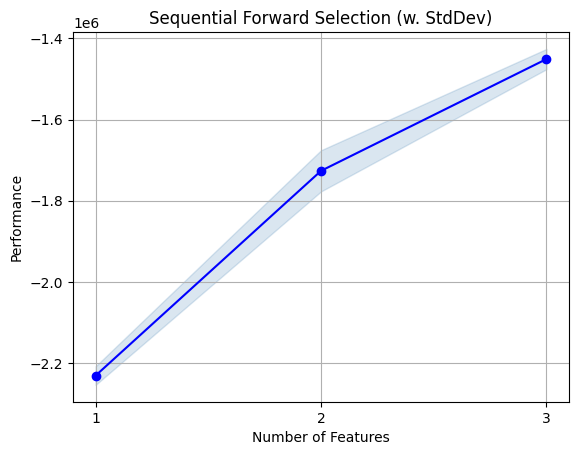

In [317]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()



In [ ]:
rfe_sfs_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_sklearn), 
    ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
    ('model', regressor)
])

rfe_sfs_pipeline.fit(X_train, y_train)

In [ ]:
predictions_sfs = rfe_sfs_pipeline.predict(X_test)

metrics = {}
metrics["mae"] = mean_absolute_error(y_test, predictions_sfs)   
metrics["mape"] = mean_absolute_percentage_error(y_test, predictions_sfs)
metrics["mse"] = mean_squared_error(y_test, predictions_sfs)

metrics
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = 'rfe_sfs_feature_selection'

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(rfe_sfs_pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact('rfe_skl_cols.txt')
    mlflow.log_artifact('rfe_skl_idx.txt')
    mlflow.log_params(model_sklearn.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')


Можно совмещать признаки, выбранные по sfs и sbs: брать их объединение или пересечение. Можно комбинировать с признаками, выделенными разными подходами - целое поле для исследований

# HYPERPARAMS
## Gridsearch

In [224]:
from sklearn.model_selection import  GridSearchCV

In [ ]:
param_grid = {
    'model__depth': [1,3,5]
}

In [ ]:
gs = GridSearchCV(rfe_sfs_pipeline, param_grid, cv=2, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)
print("Лучшие гиперпараметры:", gs.best_params_)

In [ ]:
gs_pipeline  = Pipeline(steps=[
    ('preprocessor', preprocessor_sklearn), 
    ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
    ('model', CatBoostRegressor(depth=5))
])

# Проведем стандартную проверку на тестовом множестве и залогируем run

Вместо GridSearch можно использовать RandomSearch

## Optuna

In [292]:
import optuna

In [ ]:
def objective(trial):
    # предлагаем гиперпараметры
    depth = trial.suggest_int('depth', 1, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1)

    # создаём и обучаем модель
    opt_pipeline  = Pipeline(steps=[
        ('preprocessor', preprocessor_sklearn), 
        ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
        ('model', CatBoostRegressor(depth=depth, learning_rate=learning_rate, verbose=0))
    ])

    opt_pipeline.fit(X_train, y_train)

    # предсказываем и вычисляем RMSE
    preds = opt_pipeline.predict(X_test)
    mae =  mean_absolute_error(y_test, preds)   

    return mae

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# выводим результаты
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params) 

In [ ]:
opt_pipeline  = Pipeline(steps=[
    ('preprocessor', preprocessor_sklearn), 
    ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
    ('model', CatBoostRegressor(depth=3, learning_rate=0.02789))
])

# Проведем стандартную проверку на тестовом множестве и залогируем run

Выбираем лучшую модель.
Обучаем ее на всей выборке (а не только на train-части). 
Далее будем деплоить именно её